In [29]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns

# l’indice de masse corporel (bmi) : ça permet de donner un rapport entre la taille et le poids. Idéalement, il faut être en 28.5 et 24.9
# le sexe (sex): le genre de la personne qui contracte l'assurance, homme ou femme
# l’âge (age): l'âge du principal bénéficiaire
# le nombre d’enfant à charge (children) : Nombre d'enfant couverts par l'assurance
# smoker : fumeur ou non-fumeur
# région (region) : le zone résidentielle dans les US, nord-est, sud-est, sud-ouest, nord-ouest
# charges : la prime d’assurance facturée (cible)

# Si l’IMC est :  entre 25,0 et 29,9 kg/m², il existe un surpoids ; 
# entre 30,0 et 34,9 kg/m², il s’agit d’obésité modérée ; entre 35,0 et 39,9 kg/m², 
# il s’agit d’une obésité sévère ; plus de 40 kg/m², on parle d’obésité massive.

df = pd.read_csv('profil_prime.csv')
df.head(25)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [22]:
df.tail(25)

,age,sex,bmi,children,smoker,region,charges
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1315,18,male,28.310,1,no,northeast,11272.33139
1316,19,female,20.600,0,no,southwest,1731.67700
1317,18,male,53.130,0,no,southeast,1163.46270
1318,35,male,39.710,4,no,northeast,19496.71917
1319,39,female,26.315,2,no,northwest,7201.70085
1320,31,male,31.065,3,no,northwest,5425.02335
1321,62,male,26.695,0,yes,northeast,28101.33305
1322,62,male,38.830,0,no,southeast,12981.34570


In [28]:
# nettoyer les doublons:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

# un doublon est détecté index 581 puis supprimer 
index_to_remove = 581
df = df.drop(index_to_remove)
df = df.reset_index(drop=True)




Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [44]:
# valeurs manquantes
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Text(0.5, 1.0, 'sex(clients_total: 1338)')

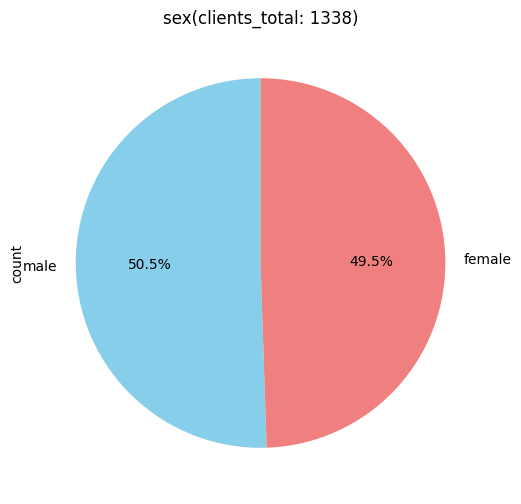

In [43]:
sex_counts = df['sex'].value_counts()
plt.figure(figsize=(6, 6))
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('sex(clients_total: 1338)')

smoker
no     1064
yes     274
Name: count, dtype: int64
1338


Text(0.5, 1.0, 'smoker (clients_total: 1338)')

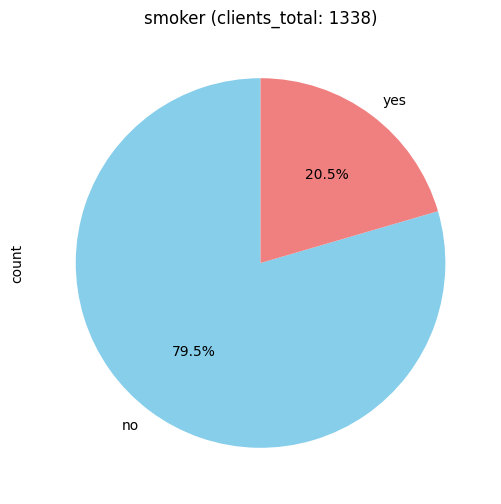

In [42]:
smoker_counts = df['smoker'].value_counts()
print(smoker_counts)
print(df.shape[0])
plt.figure(figsize=(6, 6))
smoker_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('smoker (clients_total: 1338)')